# Amazing RL Agent

In [1]:
import gymnasium as gym
import torch
import importlib

# Render screen, set to false if training
RENDER_AGENT = True


In [2]:
# Test pytorch is working

x = torch.rand(size=(1000,))
x = x + 1

# If you have a nvidia gpu with torch installed correctly
# you can move the tensors to the gpu for some extra
# speed, not necessary although.
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")
# When creating a new tensor make sure you move it to a
# device using .to(DEVICE), such as:
x = x.to(DEVICE)
# The tensor in x has been moved to the device


Using cpu


In [3]:
# Import agent
import agents

# Reload module as jupyter notebooks wont update to any changes you've made
importlib.reload(
    agents
)
# agent = agents.Agent()


<module 'agents' from 'c:\\Users\\oyvin\\Documents\\Personal\\2   Utdanning\\Master of Computing\\5   Year 4 - Final Year\\CM50270 Reinforcement Learning\\Coursework 2\\ReinforcementLearningCW2\\agents.py'>

Episode: 0, Reward: -111.87637313708663
Episode: 10, Reward: -97.66545783735316
Episode: 20, Reward: -101.63031620741884
Episode: 30, Reward: -15.021443213075349
Episode: 40, Reward: -11.191737808316981
Episode: 50, Reward: -10.142645941187974
Episode: 60, Reward: -10.769599790503616
Episode: 70, Reward: -11.185899076392287
Episode: 80, Reward: -11.016137918402785
Episode: 90, Reward: -11.01609969195727
Episode: 100, Reward: -11.365368181953862
Episode: 110, Reward: -10.69656807844841
Episode: 120, Reward: -10.944363765011264
Episode: 130, Reward: -11.117738275776341
Episode: 140, Reward: -11.63384028268857
Episode: 150, Reward: -11.098689465771152
Episode: 160, Reward: -11.598542829285098
Episode: 170, Reward: -5.096105240752335
Episode: 180, Reward: -10.814948553969499
Episode: 190, Reward: -11.347275390714442
Episode: 200, Reward: -11.366608594348067
Best reward: -4.430207882811661


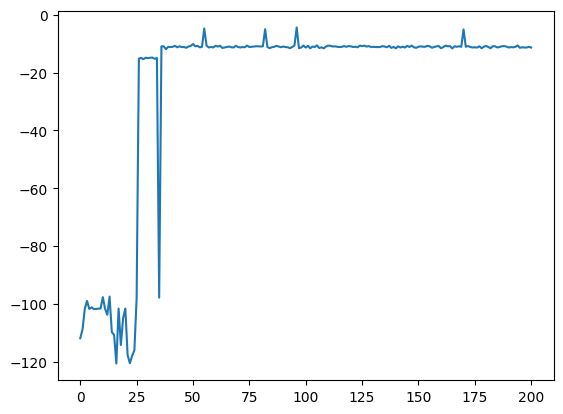

In [4]:
# Globals
episodes = 201
steps_per_episode = 200
seed = 27


# Rounding Temporal Difference Model
env = gym.make("BipedalWalker-v3", hardcore=True, render_mode="human") # 'rgb_array'
state_space = env.observation_space
action_space = env.action_space

discrete_actions = 20 # number of possible actions
discrete_states = 1  # 2  # number of states per dimension - performs worse with higher values
"""
Bipedal Environment has 24 dimensions, with values of: 
discrete_actions = 5  # 4 action spaces between (-1,1)
discrete_states = 2
we then have 2^24 * 5 = 268,435,456 state-action spaces 
"""

agent_TD = agents.RoundingTDAgent(state_space, action_space, discrete_actions, discrete_states, DEVICE)
reward_list = []
best_reward = -1000
for episode in range(episodes):
    observation, info = env.reset(seed=seed)
    action = agent_TD.choose_action(env.action_space, observation)
    
    rewards = 0
    for _ in range(steps_per_episode):
        observation_next, reward, terminated, truncated, info = env.step(action)
        action_next = agent_TD.choose_action(env.action_space, observation_next)

        agent_TD.update(observation, observation_next, reward, terminated, truncated)        

        observation = observation_next
        action = action_next
        rewards += reward

        if terminated or truncated:
            break

        env.render()
    
    if episode % 10 == 0:
        print(f"Episode: {episode}, Reward: {rewards}")
    
    if rewards > best_reward: 
        best_reward = rewards
    
    reward_list.append(rewards)

env.close()

print(f"Best reward: {best_reward}")

import matplotlib.pyplot as plt
plt.plot([i for i in range(len(reward_list))], reward_list)
plt.show()
